In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from numpy.linalg import inv, qr, det
import nltk
import os
import seaborn as sns
%matplotlib inline

In [3]:
# importing original data set with outliers for initial analysis
df=pd.read_excel('VAE1817_BSEV_F1.xlsx')
df.head()

,AGE_YRS,NUMDAYS,VAX_DOSE_SERIES,M/F,BIRTHDEF_Y/N,NUM_SYMPS,SYMP_SEV,MEDS_Y/N,CILL_Y/N,HIST_Y/N,...,AR,GM,LA,LG,LL,MO,NS,RA,RL,SEVERITY
0,35.0,18,1,1,0,2,2.000000,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,67.0,4,1,0,0,5,0.000000,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,52.0,3,2,1,0,1,0.000000,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,11.0,52,1,1,0,2,0.000000,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,16.0,0,1,0,0,3,1.333333,1,1,1,...,0,0,0,0,0,0,0,1,0,1


In [5]:
Y=df['SEVERITY']

In [6]:
# import the 2018 raw data for visualization of gaps
df_init=pd.read_excel('2018VAERSDATA.xlsx')

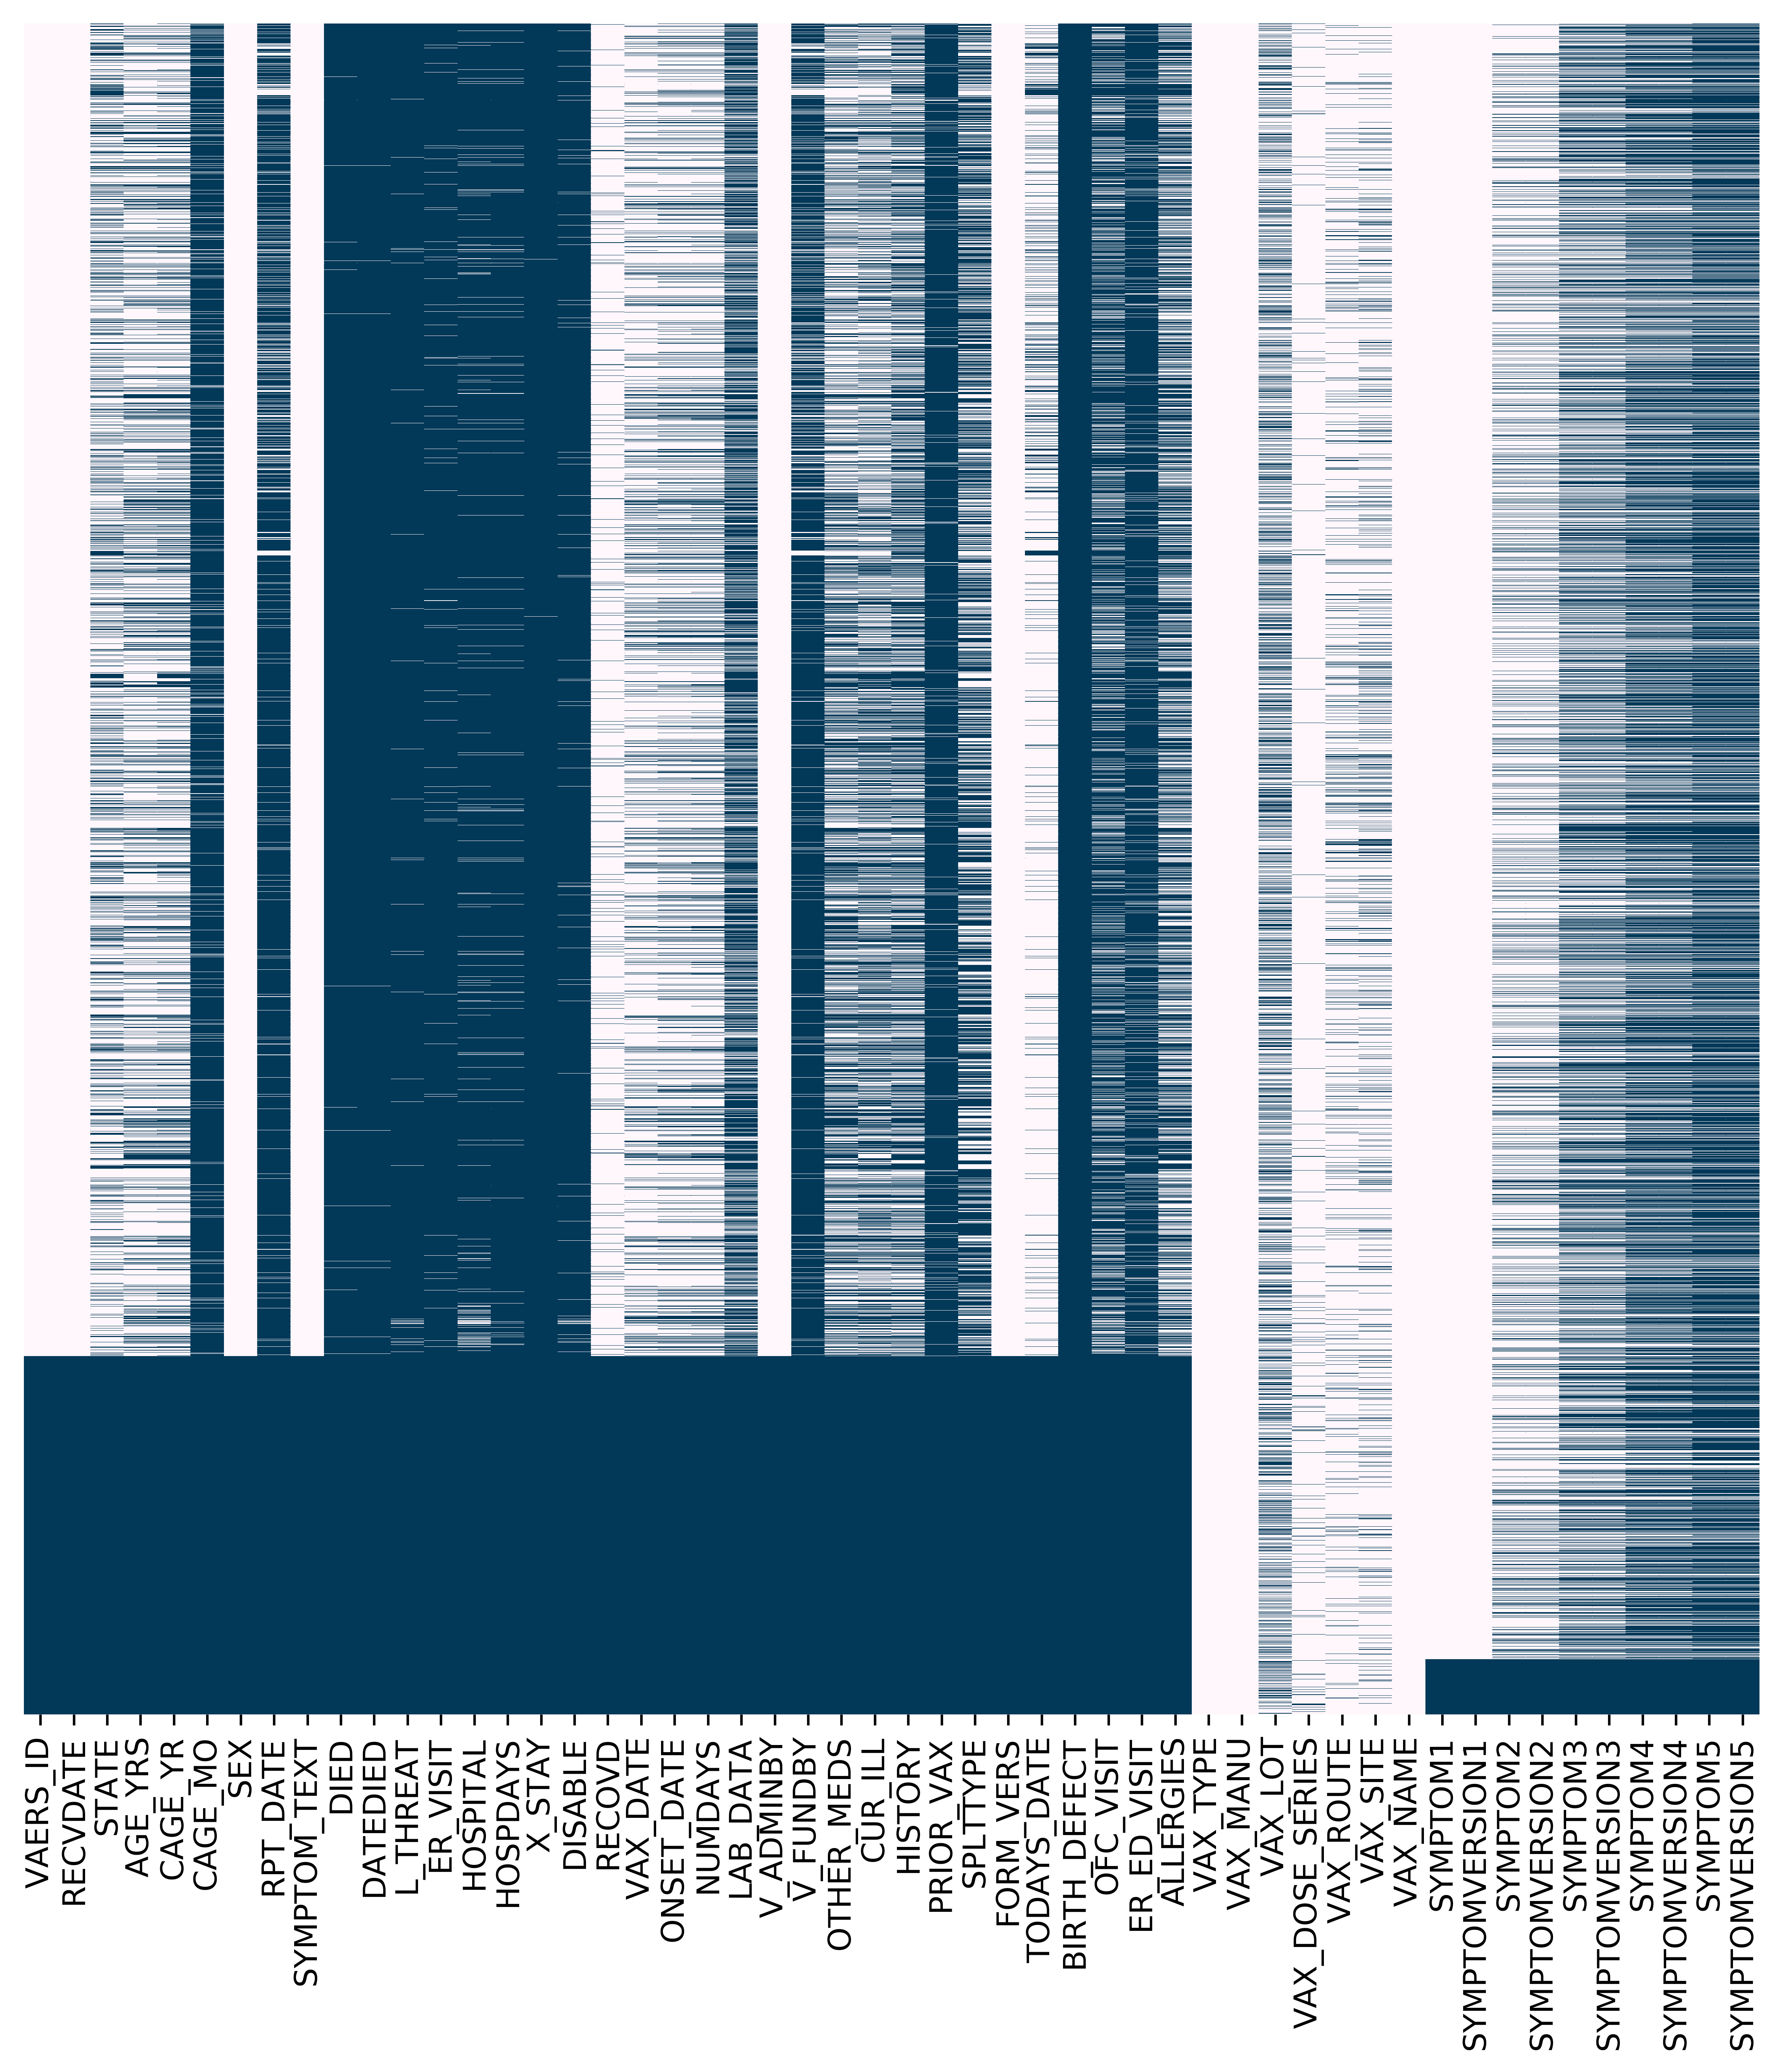

In [16]:
#visualizing the NaN values within the 2018 raw data
# blue spots indicate missing data
plt.figure(figsize=(10,10),dpi=600)
sns.heatmap(df_init.isnull(),yticklabels=False,cbar=False,cmap='PuBu')
plt.savefig('Data_Blanks_Heatmap.png')

In [17]:
# importing final data without any outliers
df=pd.read_excel('VAE1718_NoOutliers_BSEV_F_Young1.xlsx')

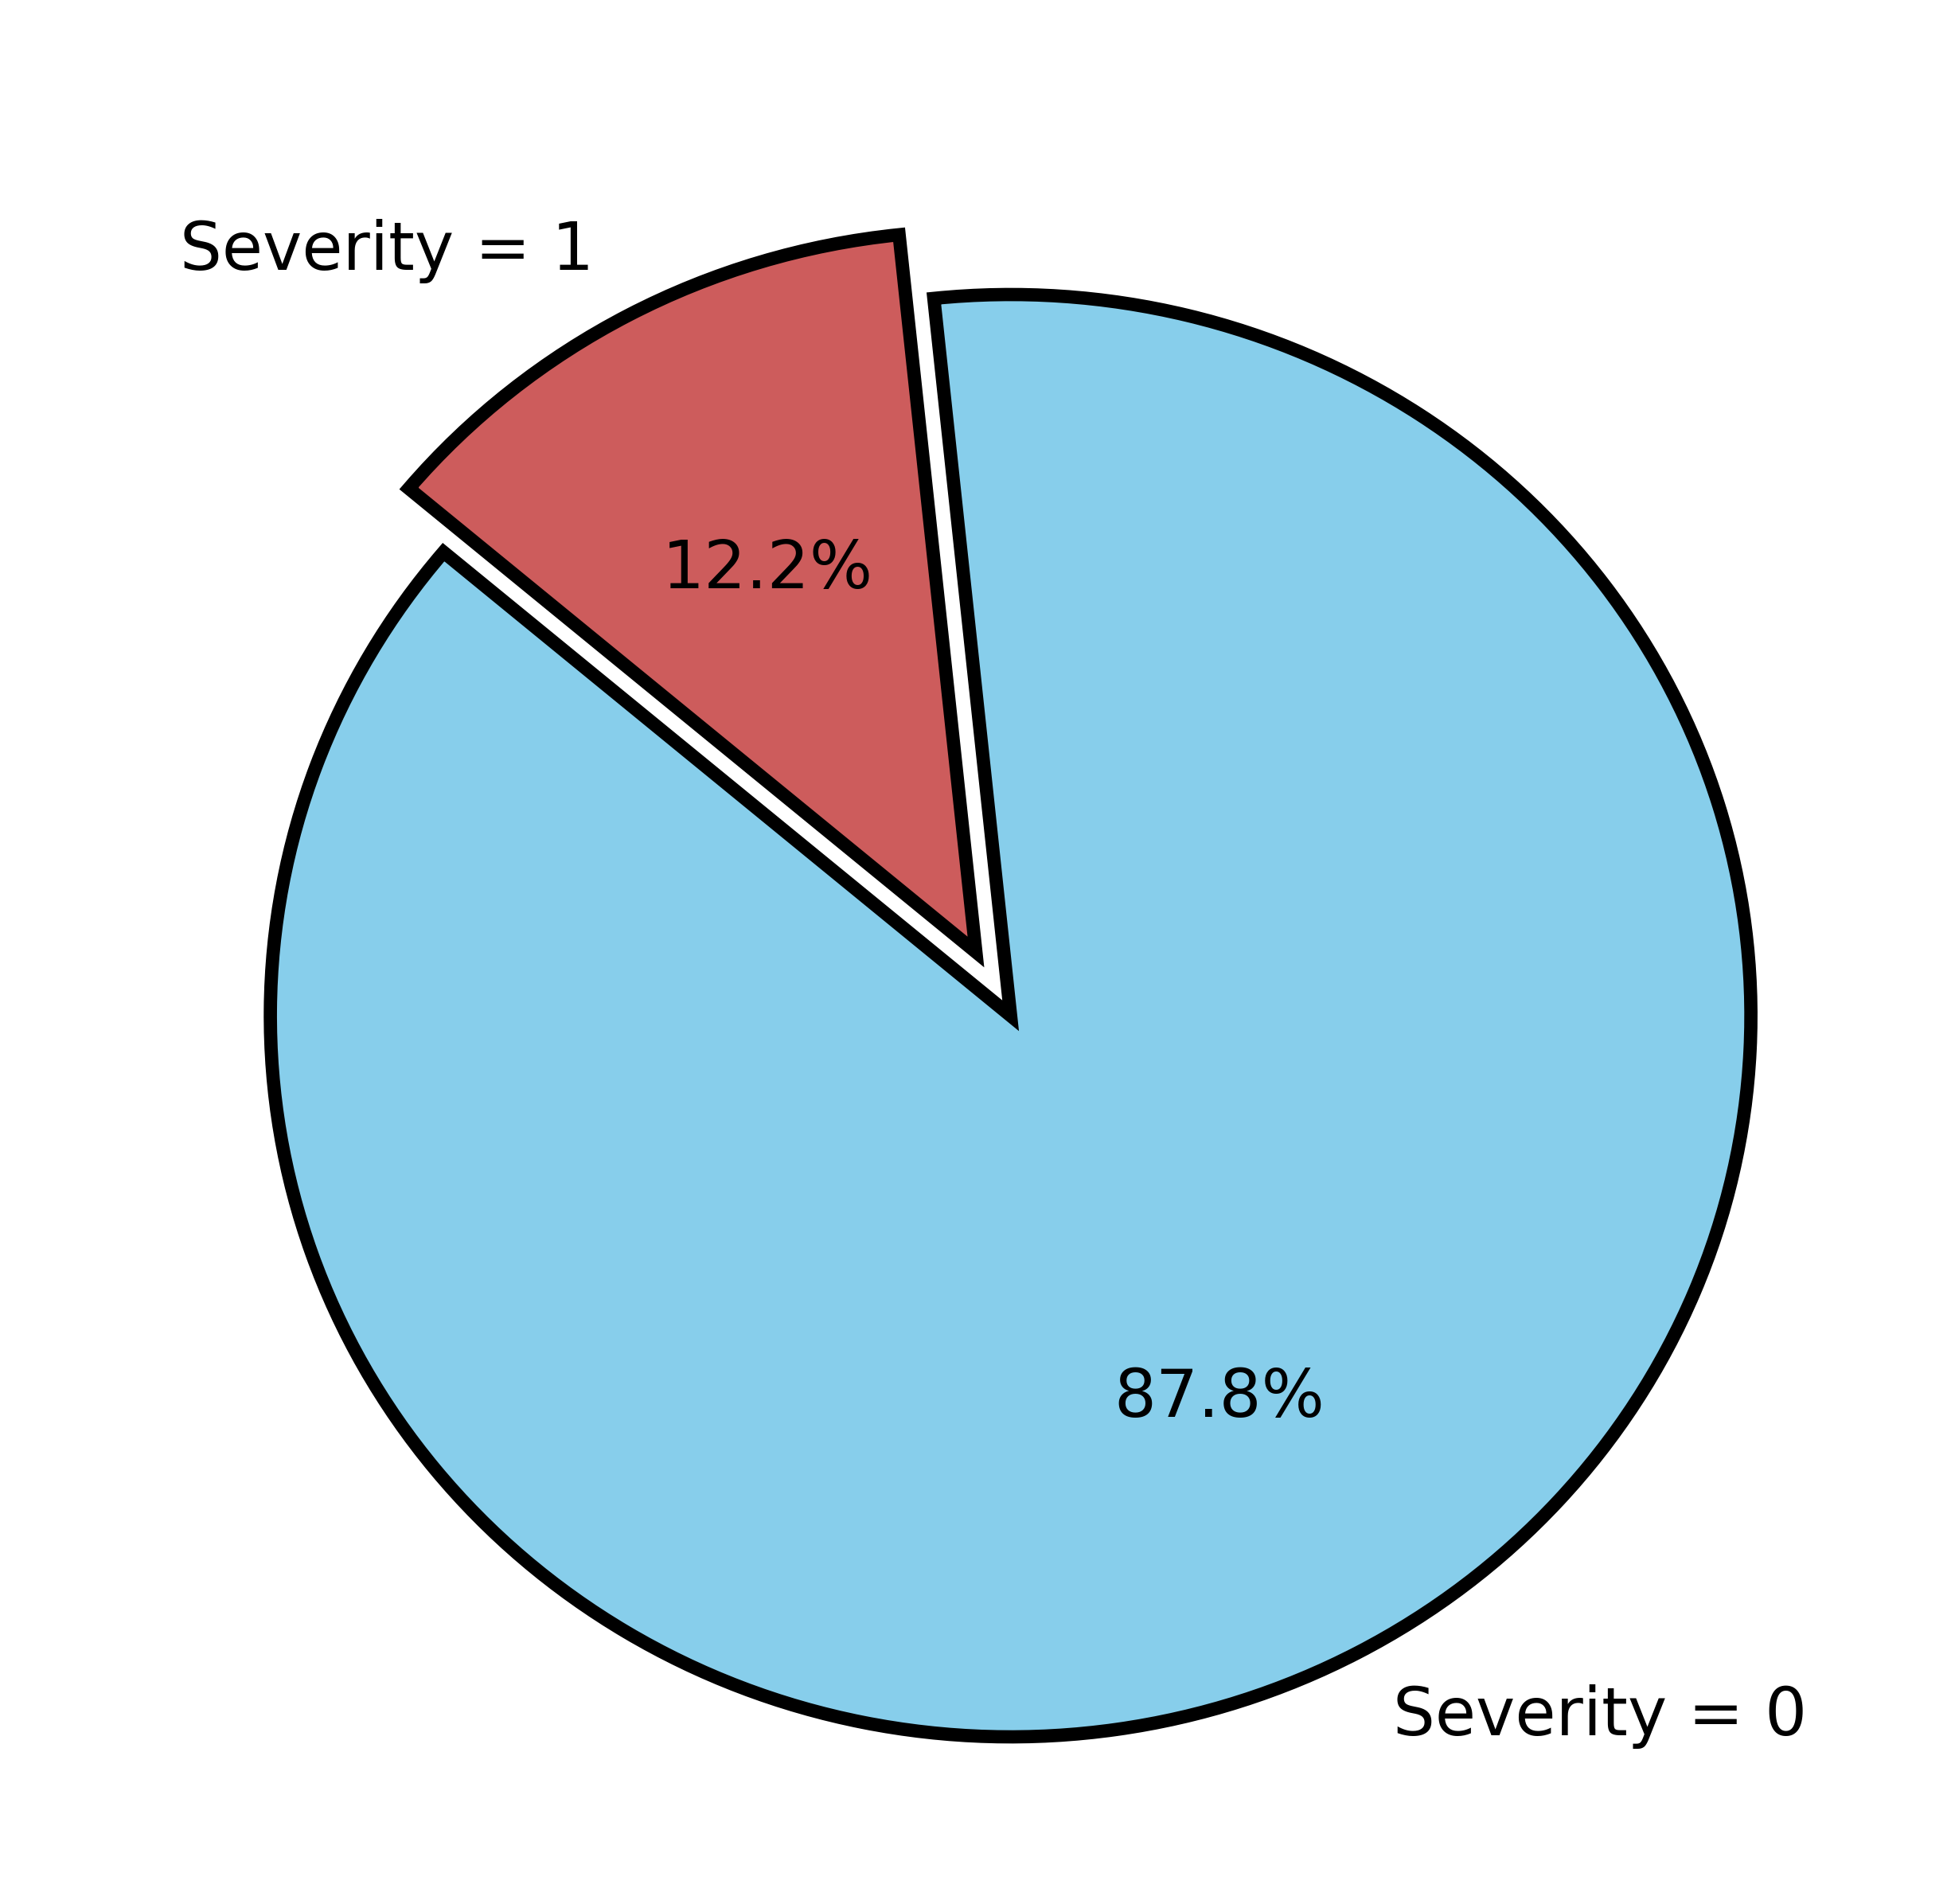

In [35]:
# visualizing the distribution of classes
# group by severity and record counts
sev0=df.groupby('SEVERITY').size()[0]
sev1=df.groupby('SEVERITY').size()[1]
plt.figure(figsize=(5,5),dpi=600)
labels = 'Severity = 0', 'Severity = 1'
sizes = [sev0,sev1]
colors = ['skyblue','indianred']
explode = (0.1, 0)
# Plot
# plotting counts are pie chart segments
plt.pie(sizes,  labels=labels, colors=colors,
autopct='%1.1f%%', explode=explode, startangle=140
        ,wedgeprops={'linewidth' : 2,'edgecolor' : "black" })

plt.savefig('Severity_Distribution.png')
plt.show()


In [3]:
# importing young group for gender visualization
df2=pd.read_excel('VAE1817_BSEV_F_Young1.xlsx')

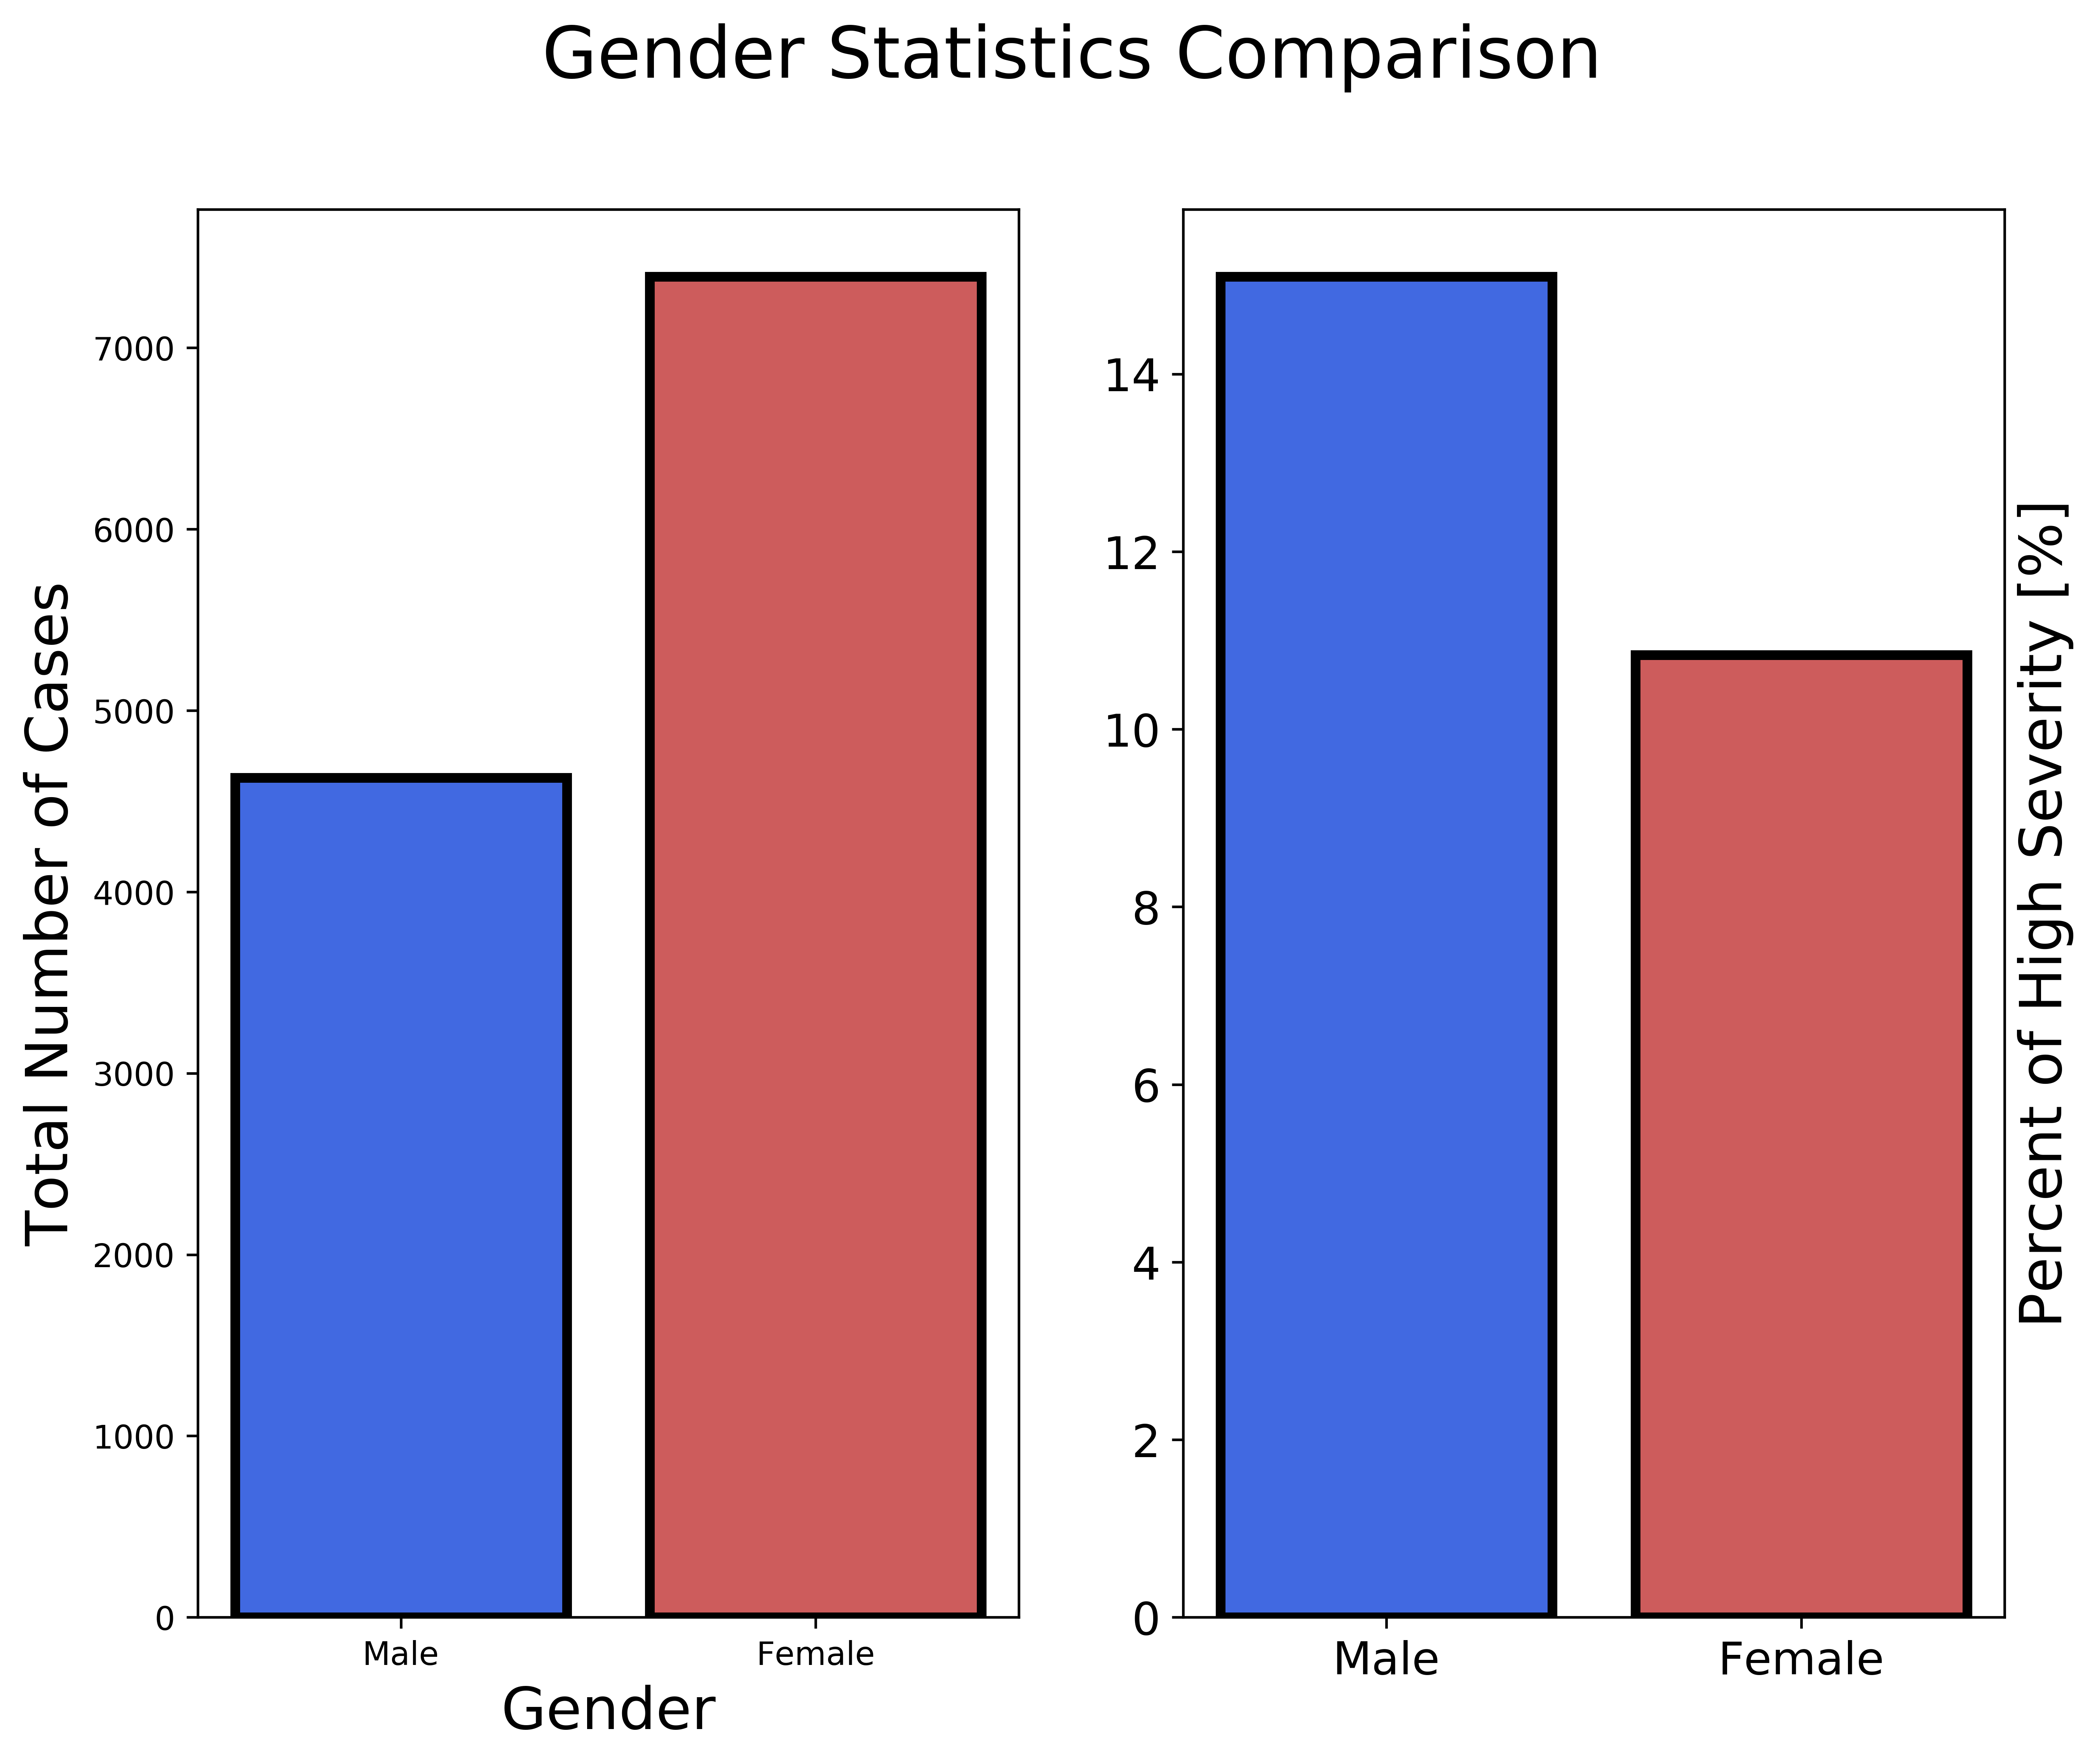

In [7]:
# group by relevant features to obtain counts
x = np.arange(2)
nM=df2.groupby('M/F').size()[0]
nF=df2.groupby('M/F').size()[1]
nMsev=df2.groupby(['M/F','SEVERITY']).size()[0,1]
nFsev=df2.groupby(['M/F','SEVERITY']).size()[1,1]
# producing figure with two subplots, one for severity fraction and one for total count
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,8),dpi=600)
f.suptitle('Gender Statistics Comparison',fontsize=22)
ax1.set_xlabel('Gender', fontsize=18)
ax1.bar(x=[0,1],height=[nM,nF],color=['royalblue','indianred'],edgecolor='black',linewidth=3)
ax2.bar(x=[0,1],height=[(nMsev/nM)*100,(nFsev/nF)*100],color=['royalblue','indianred'],edgecolor='black',linewidth=3)
plt.setp((ax1, ax2), xticks=[0, 1], xticklabels=['Male', 'Female'])
ax1.set_ylabel('Total Number of Cases',fontsize=18)
ax2.set_ylabel('Percent of High Severity [%]',fontsize=18)
ax2.yaxis.set_label_position("right")
#plt.spines.set_color('black')
ax.get_yaxis().tick_left() 
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14) 
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black') 
ax1.spines['right'].set_color('black')
ax1.spines['left'].set_color('black')
#ax1.vlines(color='white')
ax2.spines['bottom'].set_color('black')
ax2.spines['top'].set_color('black') 
ax2.spines['right'].set_color('black')
ax2.spines['left'].set_color('black')
#ax2.vlines.set_color('white')
f.savefig('Gender_Compare.png')
plt.show()

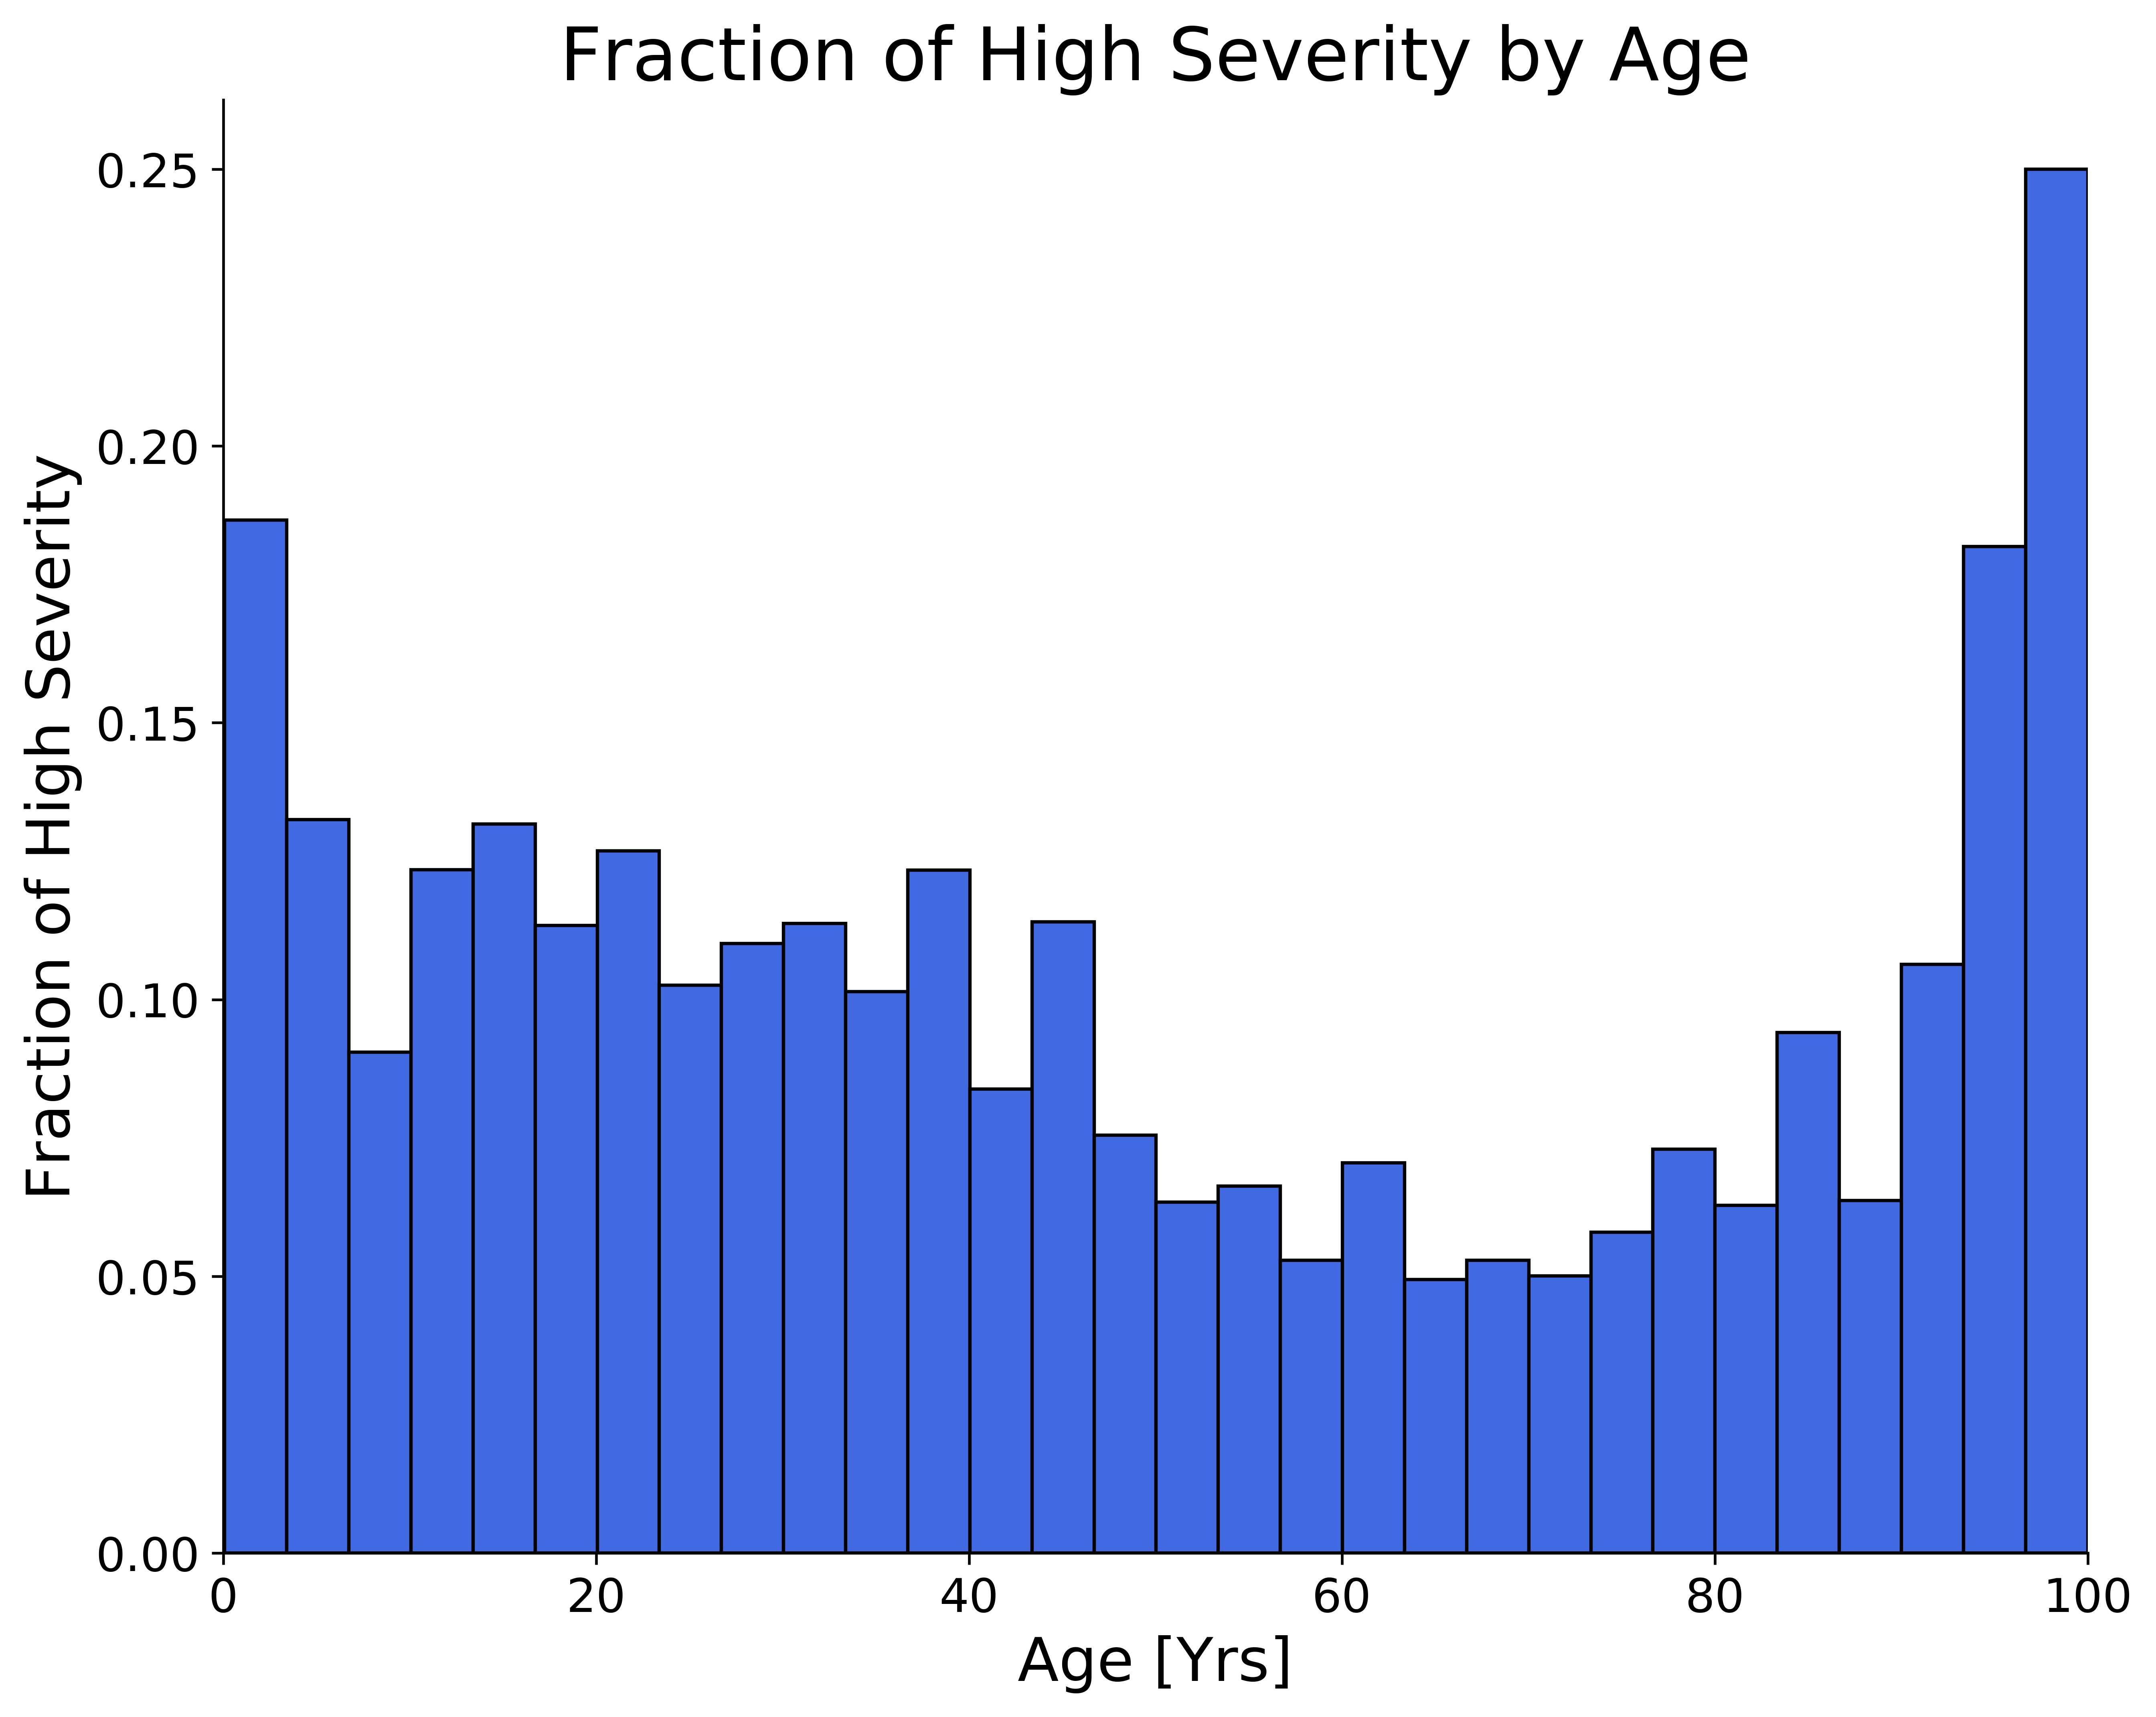

In [6]:
# plotting the impact of age on severity frequency
fig, ax = plt.subplots(figsize=(10,8),dpi=600)

# First isolating the high severity cases
df_temp=df.loc[df['SEVERITY']>0]
# next, obtain the counts of values within age bins
counts, bin_edges = np.histogram(df['AGE_YRS'], bins=30)
# doing the same with the high severity values
counts2, bin_edges2 = np.histogram(df_temp['AGE_YRS'], bins=30)
# calculate fraction of high severity per bin
x=(counts2/counts)

ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)
#building a bar plot with the obtained bin edge values, using the fraction of high severity for each bin
ax.bar((bin_edges[1:] + bin_edges[:-1]) * .5, x, width=(bin_edges[1] - bin_edges[0]),color='royalblue',edgecolor='black')
ax.set_ylabel("Fraction of High Severity", fontsize=18)
ax.set_xlim(0,100)
ax.set_title('Fraction of High Severity by Age', fontsize=22)
ax.set_xlabel('Age [Yrs]',fontsize=18)
plt.show()
fig.savefig('AGE_Severity.png')

C:\Users\david\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


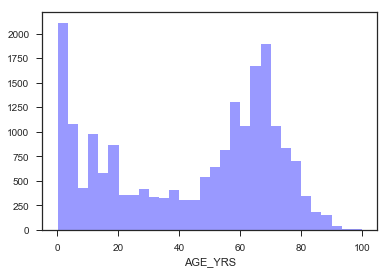

In [10]:
# plots here and below are leftover from persona exploration, they are not particularly relevant
df_temp2=df.loc[df['SEVERITY']<1]
sns.distplot(df_temp2['AGE_YRS'].dropna(), kde=False, bins=30, color='Blue')

E:\Program Files (x86)\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


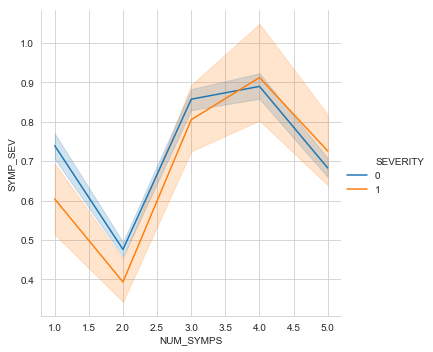

In [97]:
sns.set_style('whitegrid')
#sns.set(style="ticks")
g=sns.relplot(x='NUM_SYMPS',y='SYMP_SEV',hue='SEVERITY', data=df, kind='line')

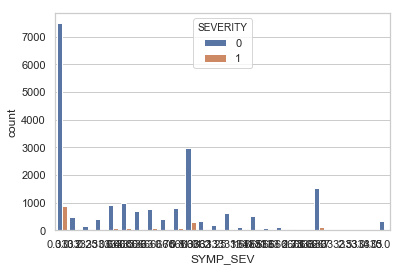

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='SYMP_SEV', hue='SEVERITY', data=df)

E:\Program Files (x86)\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


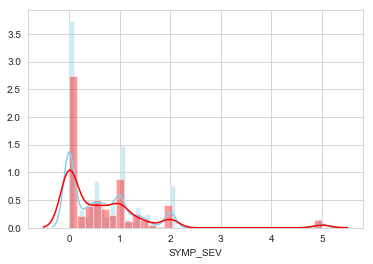

In [3]:
sns.set_style('whitegrid')
df1=df.loc[df['SEVERITY']<1]
df2=df.loc[df['SEVERITY']>0]
sns.distplot( df1["SYMP_SEV"] , color="skyblue", label="Sev=0")
sns.distplot( df2["SYMP_SEV"] , color="red", label="Sev=1")
#legend.show()

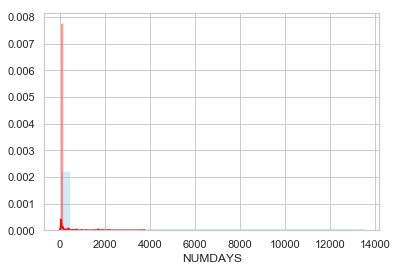

In [18]:
sns.distplot( df1["NUMDAYS"] , color="skyblue", label="Sev=0",bins=30)
sns.distplot( df2["NUMDAYS"] , color="red", label="Sev=1",bins=30)

(0, 20)

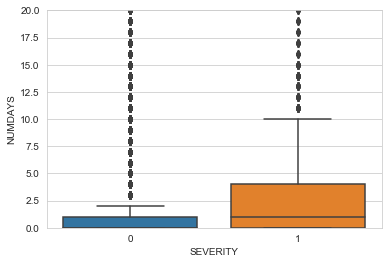

In [22]:
sns.boxplot(y='NUMDAYS', x='SEVERITY', data=df)
plt.ylim(0,20)
#from boxplot can read outliers as >30days

E:\Program Files (x86)\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


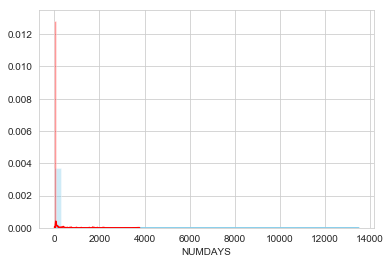

In [4]:
sns.set_style('whitegrid')
sns.distplot( df1["NUMDAYS"] , color="skyblue", label="Sev=0")
sns.distplot( df2["NUMDAYS"] , color="red", label="Sev=1")

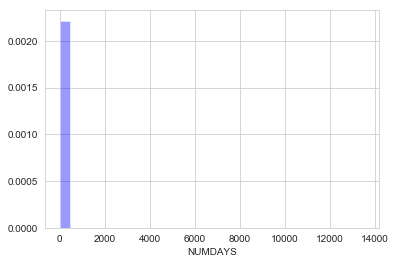

In [7]:
sns.distplot(df['NUMDAYS'].dropna(), kde=False, bins=30, color='Blue', norm_hist=True)